In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
from pandas_datareader import DataReader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [15]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.405045


In [18]:
#globals changed the string name to a dataframe variable

In [19]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,206.858805,203.282908,204.903505,205.264821,2.841459e+07,203.974804
std,32.977083,32.936190,32.968400,33.014051,1.110567e+07,33.655729
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,184.225006,181.029999,183.300003,182.659996,2.099195e+07,181.423927
50%,203.729996,200.479996,201.850006,202.589996,2.604360e+07,200.753860
75%,222.525002,217.829994,220.719994,220.760002,3.244115e+07,220.099205
max,282.649994,279.119995,282.230011,280.410004,9.131220e+07,280.410004


In [20]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-12-24 to 2019-12-20
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


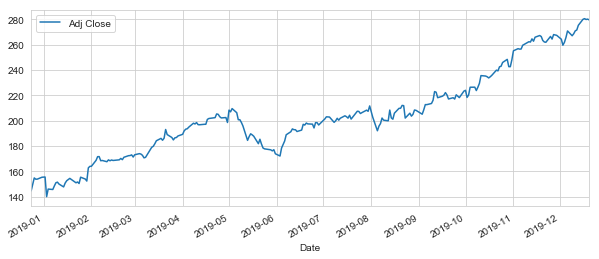

In [22]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

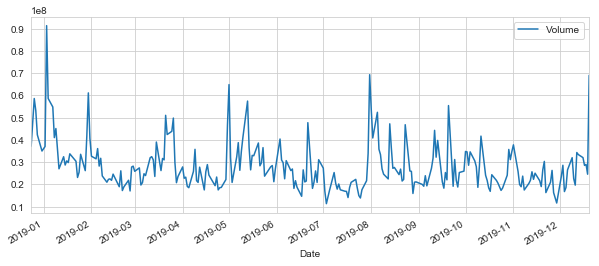

In [24]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [25]:
ma_day = [10,20,50]

In [31]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    #AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

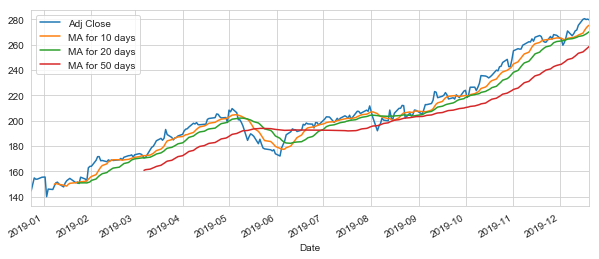

In [32]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

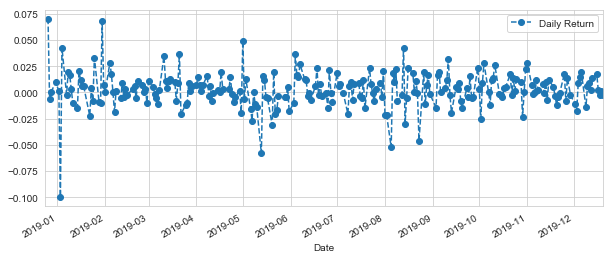

In [34]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

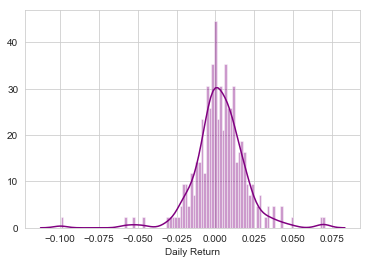

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

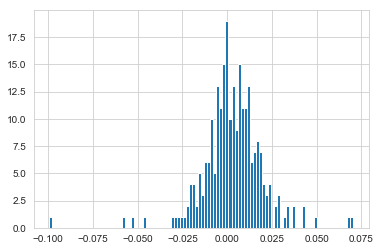

In [36]:
AAPL['Daily Return'].hist(bins=100)

In [37]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [38]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,144.656540,1343.959961,976.219971,92.758461
2018-12-26,154.843475,1470.900024,1039.459961,99.094772
2018-12-27,153.838562,1461.640015,1043.880005,99.705742
2018-12-28,153.917389,1478.020020,1037.079956,98.927246
2018-12-31,155.405045,1501.969971,1035.609985,100.090057


In [39]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [40]:
tech_rets = closing_df.pct_change()

In [41]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,NaN,NaN,NaN,NaN
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754


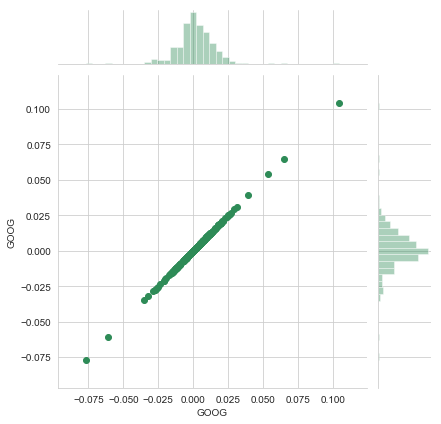

In [46]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

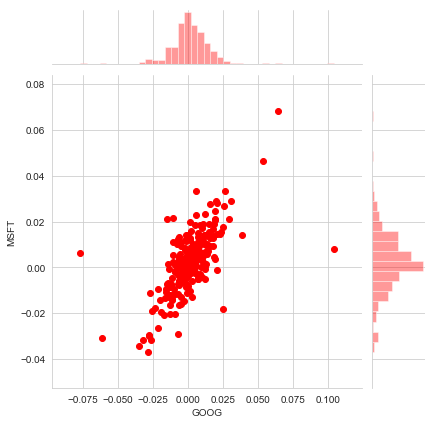

In [47]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')

In [48]:
 tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,NaN,NaN,NaN,NaN
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754


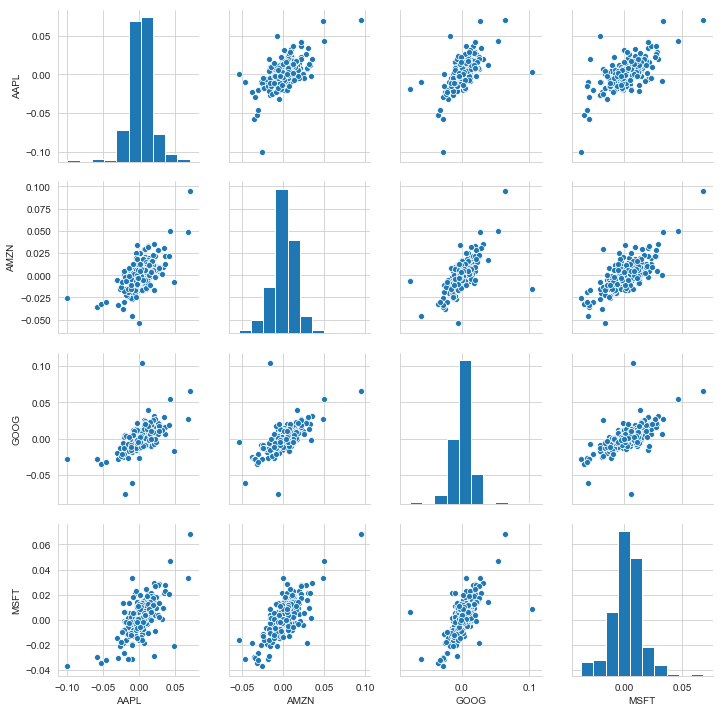

In [49]:
sns.pairplot(tech_rets.dropna())

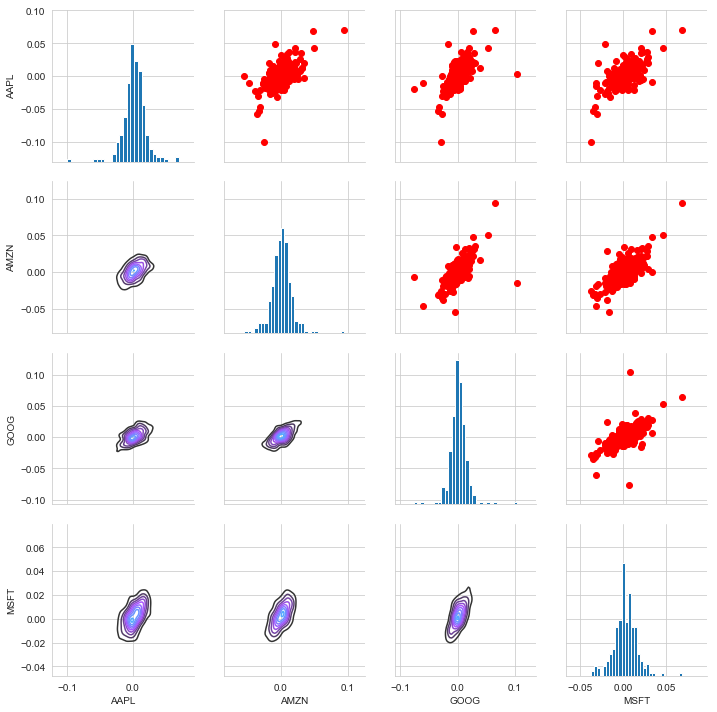

In [50]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

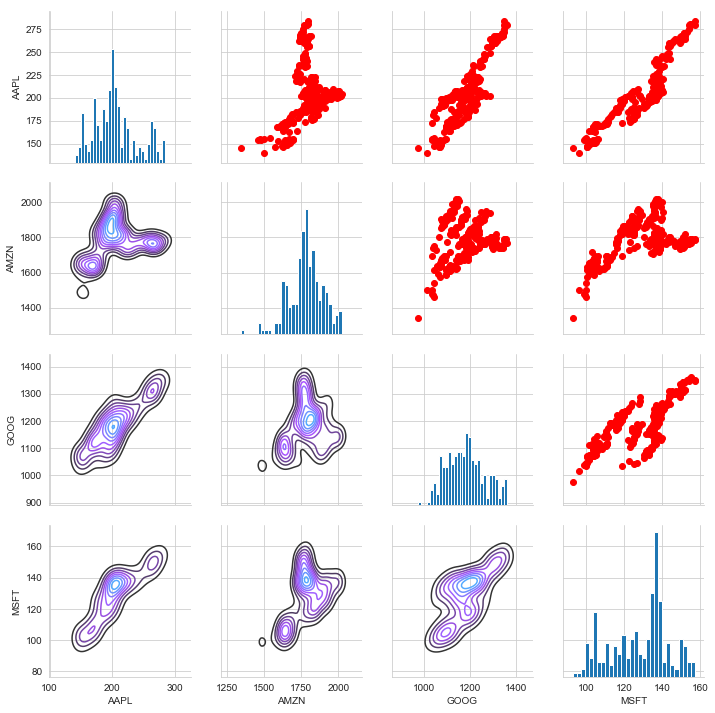

In [51]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [55]:
from seaborn.regression import corrplot

ImportError: cannot import name corrplot

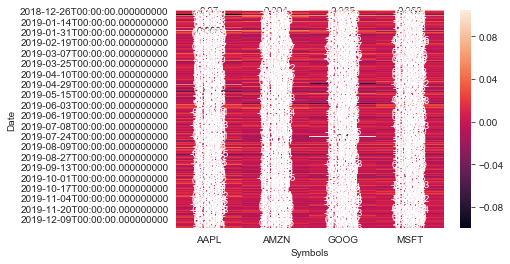

In [53]:
sns.heatmap(tech_rets.dropna(),annot=True)

In [56]:
rets = tech_rets.dropna()

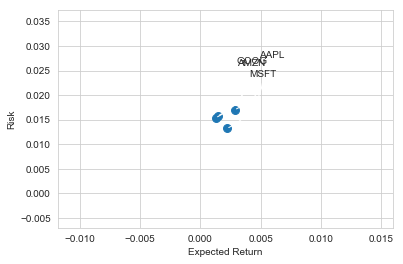

In [68]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

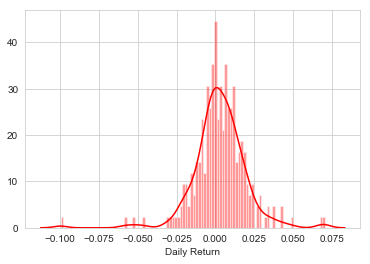

In [69]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [70]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754
2019-01-02,0.001141,0.024741,0.009888,-0.004430


In [71]:
rets['AAPL'].quantile(0.05)

-0.020661148039920474

In [72]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [73]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [74]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300,976.219971
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300,1039.459961
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800,1043.880005
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985


Text(0.5,1,'Monte Carlo Analysis for Google')

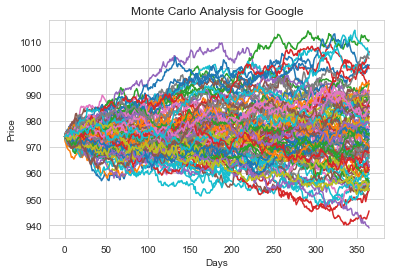

In [75]:
start_price = 973.900024

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [76]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

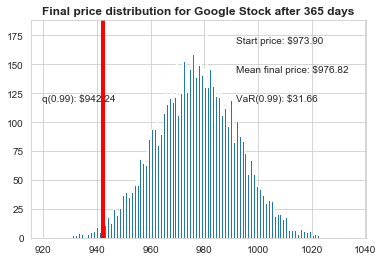

In [77]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='red')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');



In [79]:
days = 365
dt = 1/days
mu = rets.mean()['AAPL']
sigma = rets.std()['AAPL']

In [80]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540,NaN,NaN,NaN,NaN
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475,NaN,NaN,NaN,0.070422
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562,NaN,NaN,NaN,-0.006490
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389,NaN,NaN,NaN,0.000512
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.405045,NaN,NaN,NaN,0.009665


Text(0.5,1,'Monte Carlo Analysis for Apple')

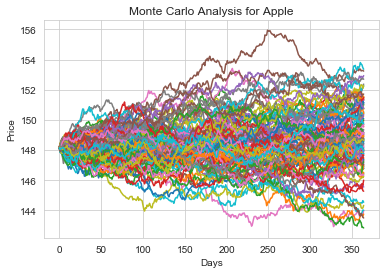

In [81]:
start_price = 148.149994

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [82]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

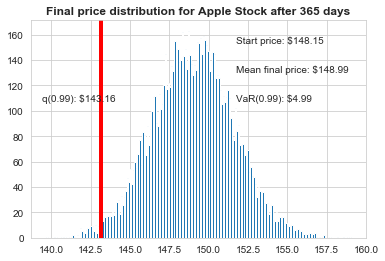

In [83]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='red')

plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

